https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-1-7d0ad817fca5
**Objective**: Create a model that can predict grades based on the student's information.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df= df.rename(columns = {'G3': 'Grade'})

In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
Grade         0
dtype: int64

In [5]:
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

school


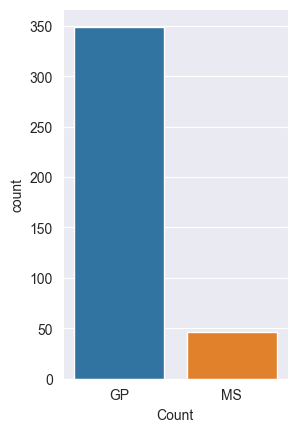

sex


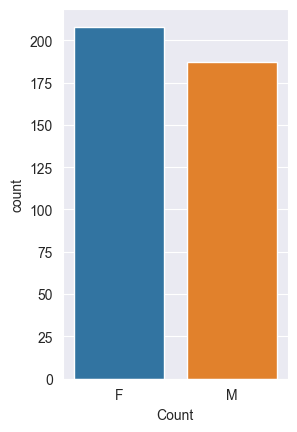

address


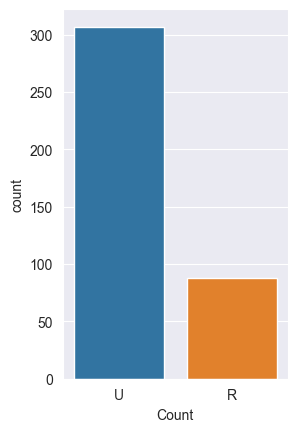

famsize


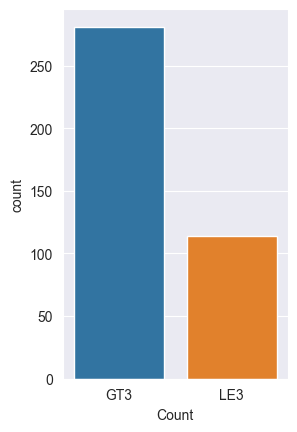

Pstatus


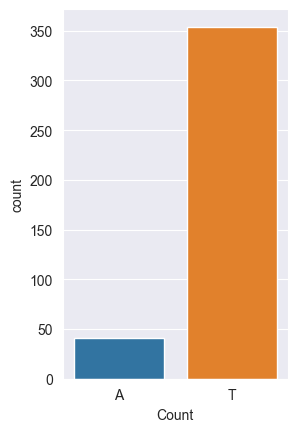

Mjob


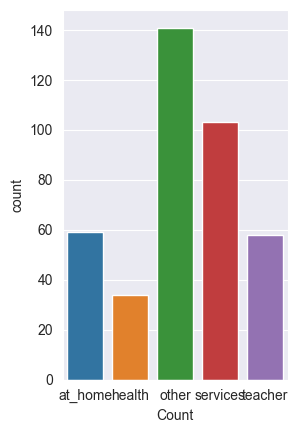

Fjob


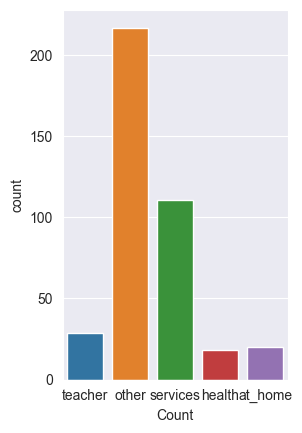

reason


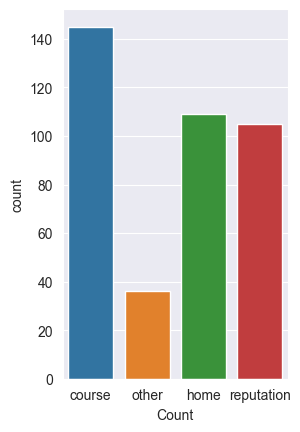

guardian


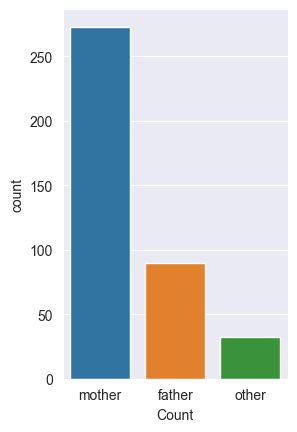

schoolsup


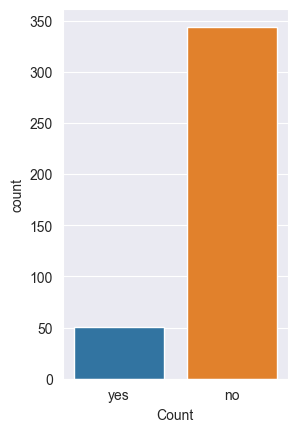

famsup


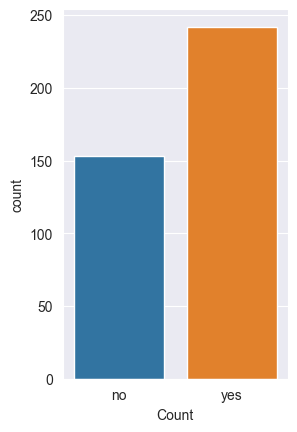

activities


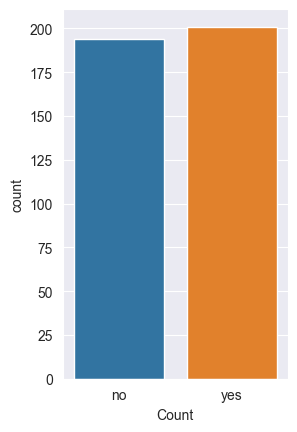

nursery


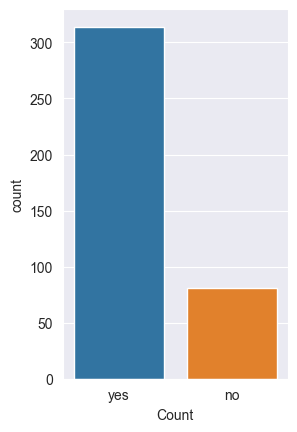

higher


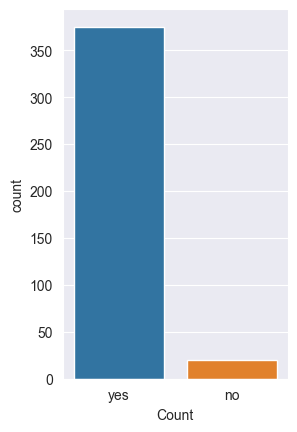

internet


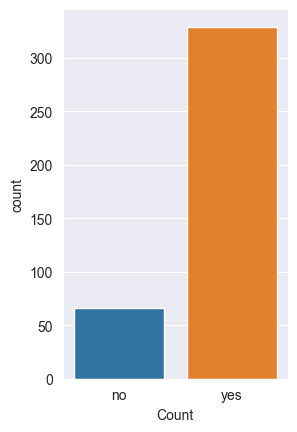

romantic


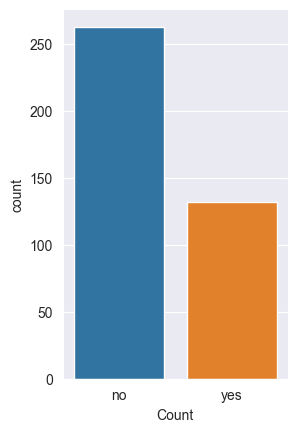

In [7]:
cat_val = df[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob','Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'internet', 'romantic']]

for col in cat_val.columns:
    print(col)
    plt.subplot(1, 2, 1)
    sns.countplot(x=df[col])
    plt.xlabel('Count')
    plt.show()

age


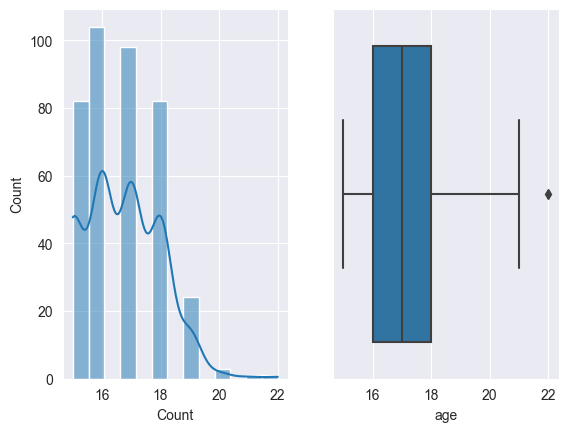

Medu


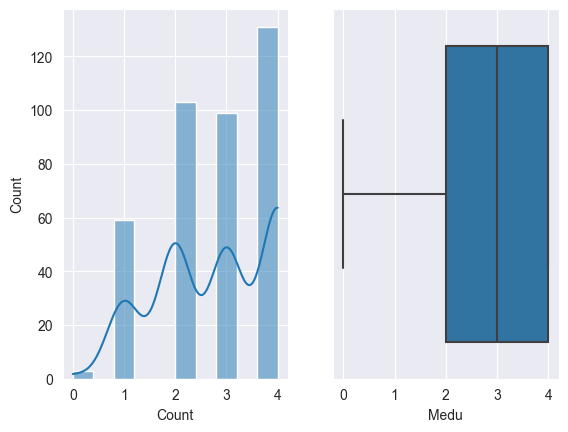

traveltime


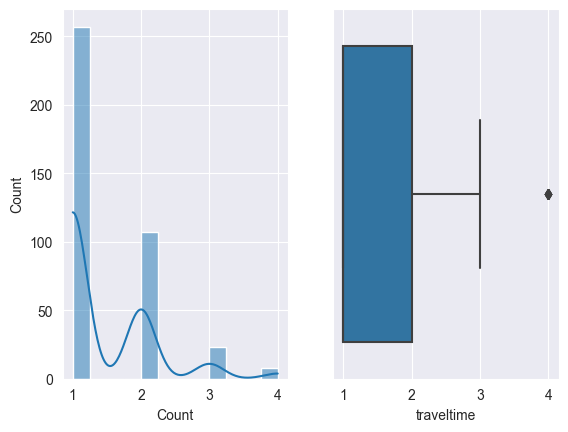

studytime


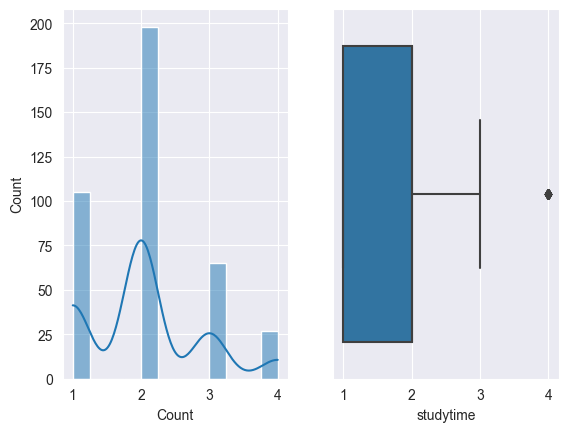

failures


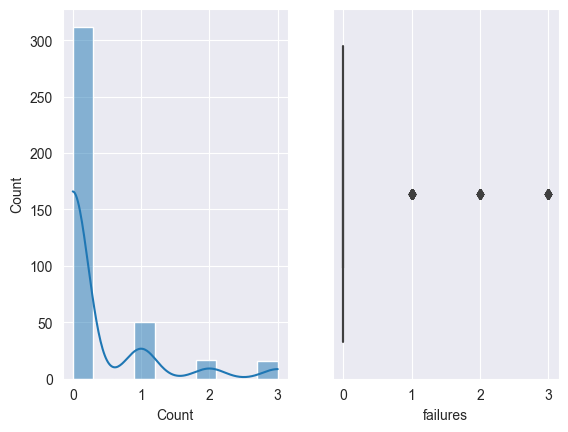

famrel


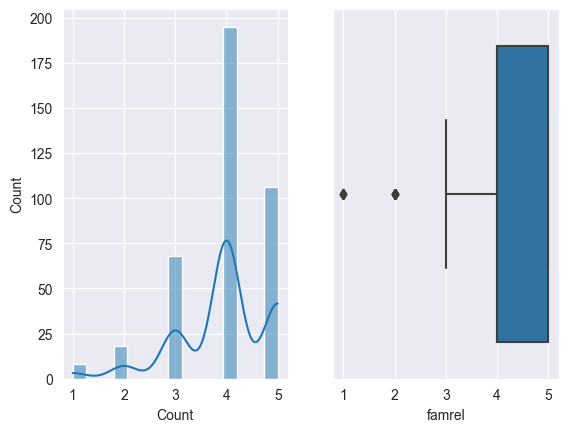

freetime


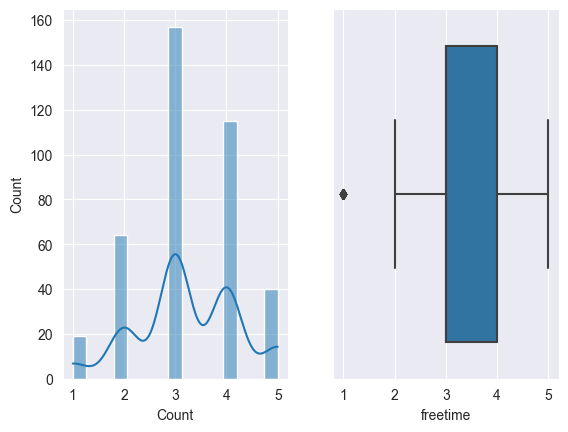

goout


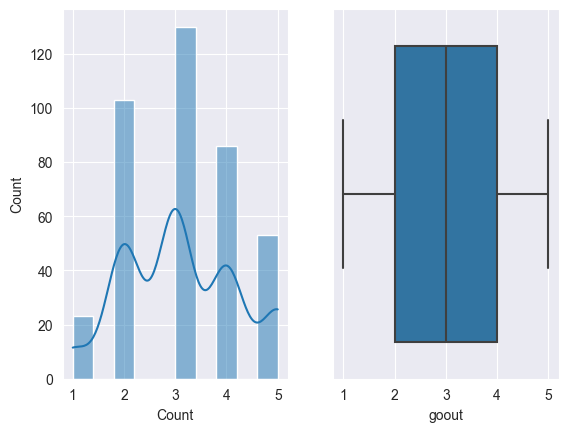

Dalc


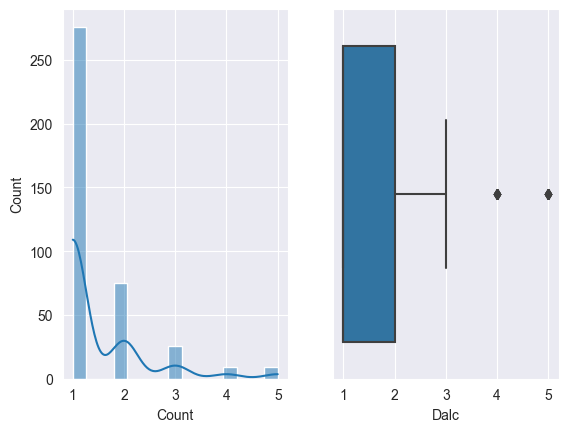

Walc


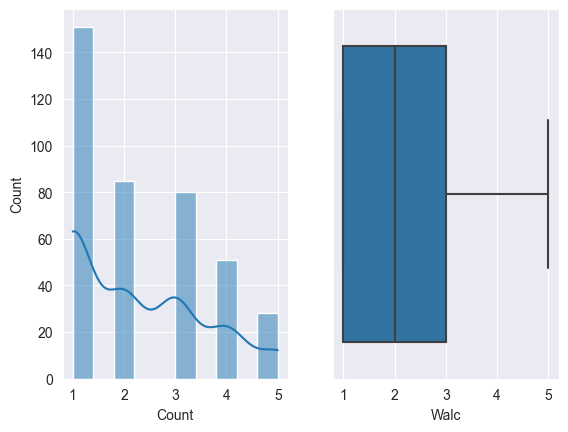

health


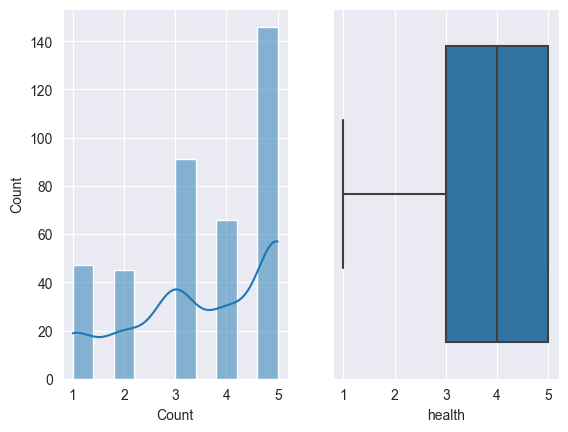

absences


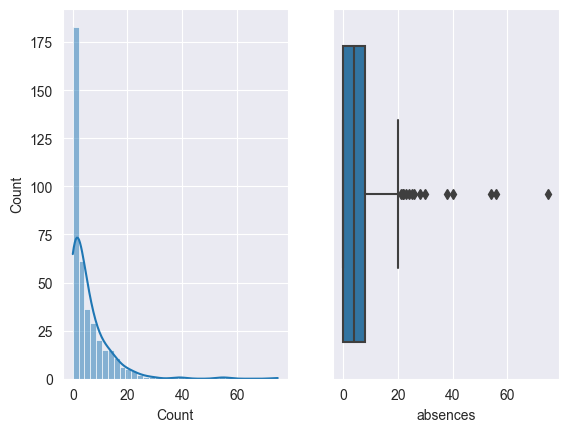

G1


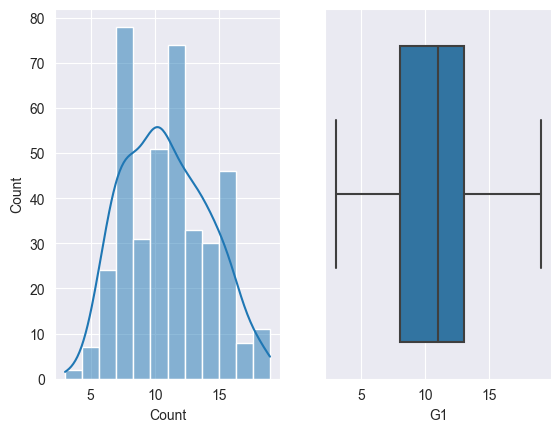

G2


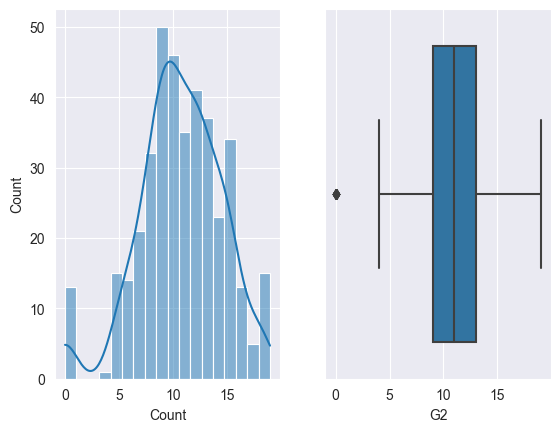

Grade


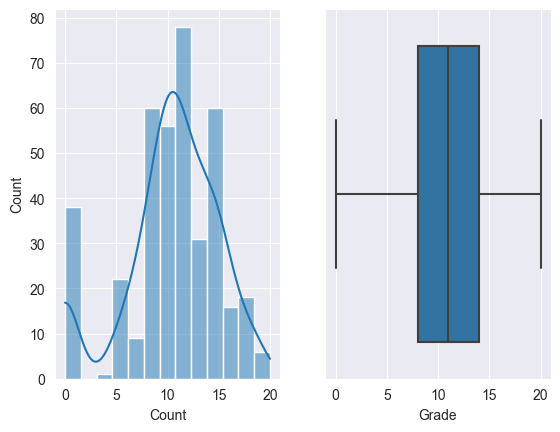

In [9]:
num_val = df[['age', 'Medu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'Grade']]

for col in num_val.columns:
    print(col)
    plt.subplot(1, 2, 1)
    sns.histplot(x=df[col], kde=True)
    plt.xlabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

C:\Users\lorac\AppData\Local\Temp\ipykernel_16312\4257838333.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=cmap)


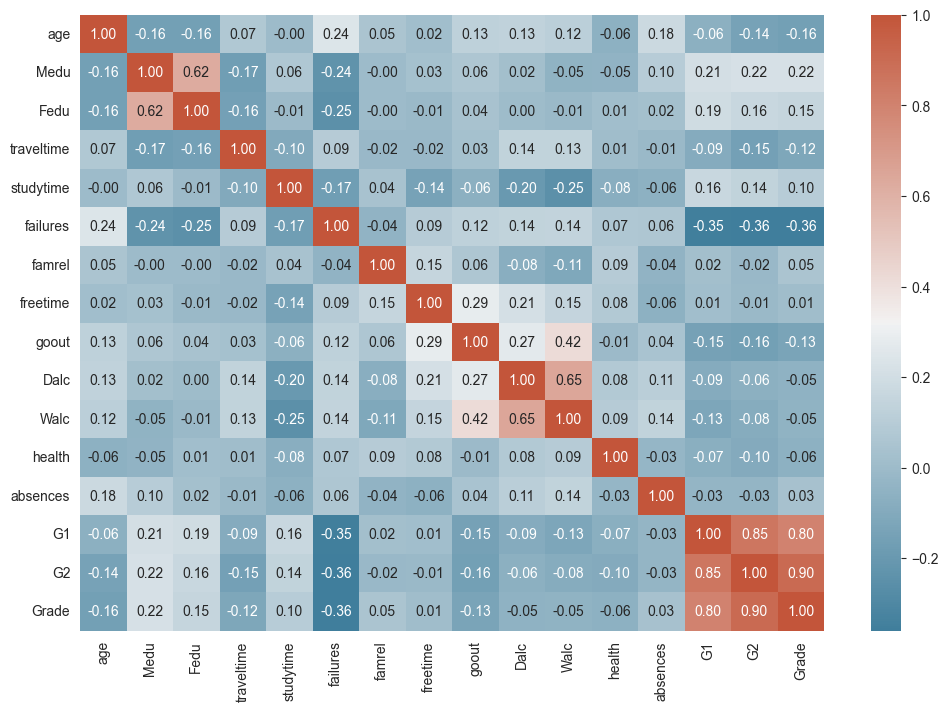

In [10]:
#Correlation
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=cmap)
plt.show()

In [11]:
df = pd.get_dummies(df)
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


**Model Building**
- Data Preparation
- Partition the data into train and test set
- Build model on the train data
- Cross-validation on the model
- Test the data on test set

In [12]:
import statsmodels.api as sm

In [13]:
X = df.drop(columns=['Grade'], axis=1)
y = df['Grade']

X = sm.add_constant(X)

In [14]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((316, 59), (79, 59))

In [15]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif['feature'] = train.columns

    #calculating vif for each feature
    vif['VIF'] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns)) ]

    return vif

In [16]:
print(checking_vif(X_train))

C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


              feature       VIF
0               const  0.000000
1                 age  1.888444
2                Medu  3.220065
3                Fedu  2.195683
4          traveltime  1.441247
5           studytime  1.412448
6            failures  1.521973
7              famrel  1.166621
8            freetime  1.333059
9               goout  1.608817
10               Dalc  2.114949
11               Walc  2.621455
12             health  1.220430
13           absences  1.261351
14                 G1  4.718767
15                 G2  4.574455
16          school_GP       inf
17          school_MS       inf
18              sex_F       inf
19              sex_M       inf
20          address_R       inf
21          address_U       inf
22        famsize_GT3       inf
23        famsize_LE3       inf
24          Pstatus_A       inf
25          Pstatus_T       inf
26       Mjob_at_home       inf
27        Mjob_health       inf
28         Mjob_other       inf
29      Mjob_services       inf
30      

In [17]:
#The dummies must be removed, since they dont contribute anything to the model, also removing the variables with high VIF: there's none.
X_train = X_train.drop(columns=['school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes', 'nursery_no', 'nursery_yes'], axis=1)
X_train.head()

,const,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
23,1.0,16,2,2,2,2,0,5,4,4,2,4,5,0,13,13
296,1.0,19,4,4,2,2,0,2,3,4,2,3,2,0,10,9
13,1.0,15,4,3,2,2,0,5,4,3,1,2,3,2,10,10
249,1.0,16,0,2,1,1,0,4,3,2,2,4,5,0,13,15
61,1.0,16,1,1,4,1,0,5,5,5,5,5,5,6,10,8


In [18]:
#now, creating a linear regression model using statsmodels OLS
model1 = sm.OLS(y_train, X_train).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Grade   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     109.2
Date:                Tue, 16 May 2023   Prob (F-statistic):          8.15e-112
Time:                        11:23:36   Log-Likelihood:                -647.25
No. Observations:                 316   AIC:                             1326.
Df Residuals:                     300   BIC:                             1387.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3234      1.780     -0.182      0.856      -3.826       3.179
age           -0.2489      0.093     -2.662      0.008      -0.433      -0.065
Medu           0.1027      0.135      0.761      0.447      -0.163       0.369
Fedu          -0.0842      0.131     -0.641      0.522      -0.343       0.174
traveltime     0.1995      0.170      1.175      0.241      -0.135       0.534
studytime     -0.1211      0.138     -0.875      0.382      -0.394       0.151
failures      -0.1657      0.180     -0.918      0.359      -0.521       0.189
famrel         0.3634      0.122      2.977      0.003       0.123       0.604
freetime       0.0676      0.119      0.566      0.572      -0.167       0.302
goout          0.1210      0.117      1.032      0.303      -0.110       0.352
Dalc          -0.1090      0.166     -0.656      0.512      -0.436       0.218
Walc           0.0630      0.128      0.493      0.623      -0.189       0.315
health         0.1045      0.080      1.311      0.191      -0.052       0.261
absences       0.0399      0.014      2.926      0.004       0.013       0.067
G1             0.1639      0.063      2.586      0.010       0.039       0.289
G2             0.9754      0.055     17.834      0.000       0.868       1.083
==============================================================================
Omnibus:                      158.967   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              766.734
Skew:                          -2.143   Prob(JB):                    3.20e-167
Kurtosis:                       9.314   Cond. No.                         414.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#Dropping the insignificant variables from the above model and creating the regression model again.
# Examining the significance of the model, meaning, the population regression parameters are significantly different from zero.
# From above, it may be noted that the regression coefficients corresponding to MEDU, FEDU, travel_time, study_time, failures, freetime, goout, Dalc, Walc, health are not statistically significant at level a=0.05. They aren't significantly different from 0 in population, hence we will eliminate the three features and create a new model.
y1 = df['Grade']
X1 = df.drop(columns={'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes', 'nursery_no', 'nursery_yes'})
X1.head()

,age,famrel,absences,G1,G2,Grade
0,18,4,6,5,6,6
1,17,5,4,5,5,6
2,15,4,10,7,8,10
3,15,3,2,15,14,15
4,16,4,4,6,10,10


In [45]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [47]:
# Applying the cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression()
linearReg.fit(X_train1, y_train1)

LinearRegression()

In [48]:
pred_x_train = linearReg.predict(X_train1)
pred_x_test = linearReg.predict(X_test1)

In [60]:
print('MAPE_TRAIN:', mean_absolute_percentage_error(y_train, pred_x_train))
print('MAPE_TEST:', mean_absolute_percentage_error(y_test, pred_x_test))

print('MAE_TRAIN:', mean_absolute_error(y_train, pred_x_train))
print('MAE_TEST:', mean_absolute_error(y_test, pred_x_test))

print('MSE_TRAIN:', mean_squared_error(y_train, pred_x_train))
print('MSE_TEST:', mean_squared_error(y_test, pred_x_test))

print('R2_TRAIN:', r2_score(y_train, pred_x_train))
print('R2_TEST:', r2_score(y_test, pred_x_test))

MAPE_TRAIN: 1.3950740098439913
MAPE_TEST: 0.564201651841279
MAE_TRAIN: 2.2547669688521994e-15
MAE_TEST: 1.845420948249744e-15
MSE_TRAIN: 8.970330210444916e-30
MSE_TEST: 6.337336075588625e-30
R2_TRAIN: 1.0
R2_TEST: 1.0


In [50]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(linearReg, X_train1, y_train1, cv=10)

print("RSquared: %0.3f (+/- %0.3f)" % (cv_score.mean(), cv_score.std() * 2))

RSquared: 1.000 (+/- 0.000)


In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
y2= df['Grade']
X2 = X1 = df.drop(columns={'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes', 'nursery_no', 'nursery_yes'})

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)

In [53]:
dt = DecisionTreeRegressor(min_samples_split=2)
dt.fit(X_train2, y_train2)

DecisionTreeRegressor()

In [55]:
pred_x_train2 = linearReg.predict(X_train2)
pred_x_test2 = linearReg.predict(X_test2)

In [56]:
print('MAPE_TRAIN:', mean_absolute_percentage_error(pred_x_train2, y_train2))
print('MAPE_TEST:', mean_absolute_percentage_error(pred_x_test2, y_test2))

print('MAE_TRAIN:', mean_absolute_error(pred_x_train2, y_train2))
print('MAE_TEST:', mean_absolute_error(pred_x_test2, y_test2))

print('MSE_TRAIN:', mean_squared_error(pred_x_train2, y_train2))
print('MSE_TEST:', mean_squared_error(pred_x_test2, y_test2))

print('R2_TRAIN:', r2_score(pred_x_train2, y_train2))
print('R2_TEST:', r2_score(pred_x_test2, y_test2))

MAPE_TRAIN: 0.10311336819041354
MAPE_TEST: 0.0440767053358358
MAE_TRAIN: 2.2547669688521994e-15
MAE_TEST: 1.845420948249744e-15
MSE_TRAIN: 8.970330210444916e-30
MSE_TEST: 6.337336075588625e-30
R2_TRAIN: 1.0
R2_TEST: 1.0


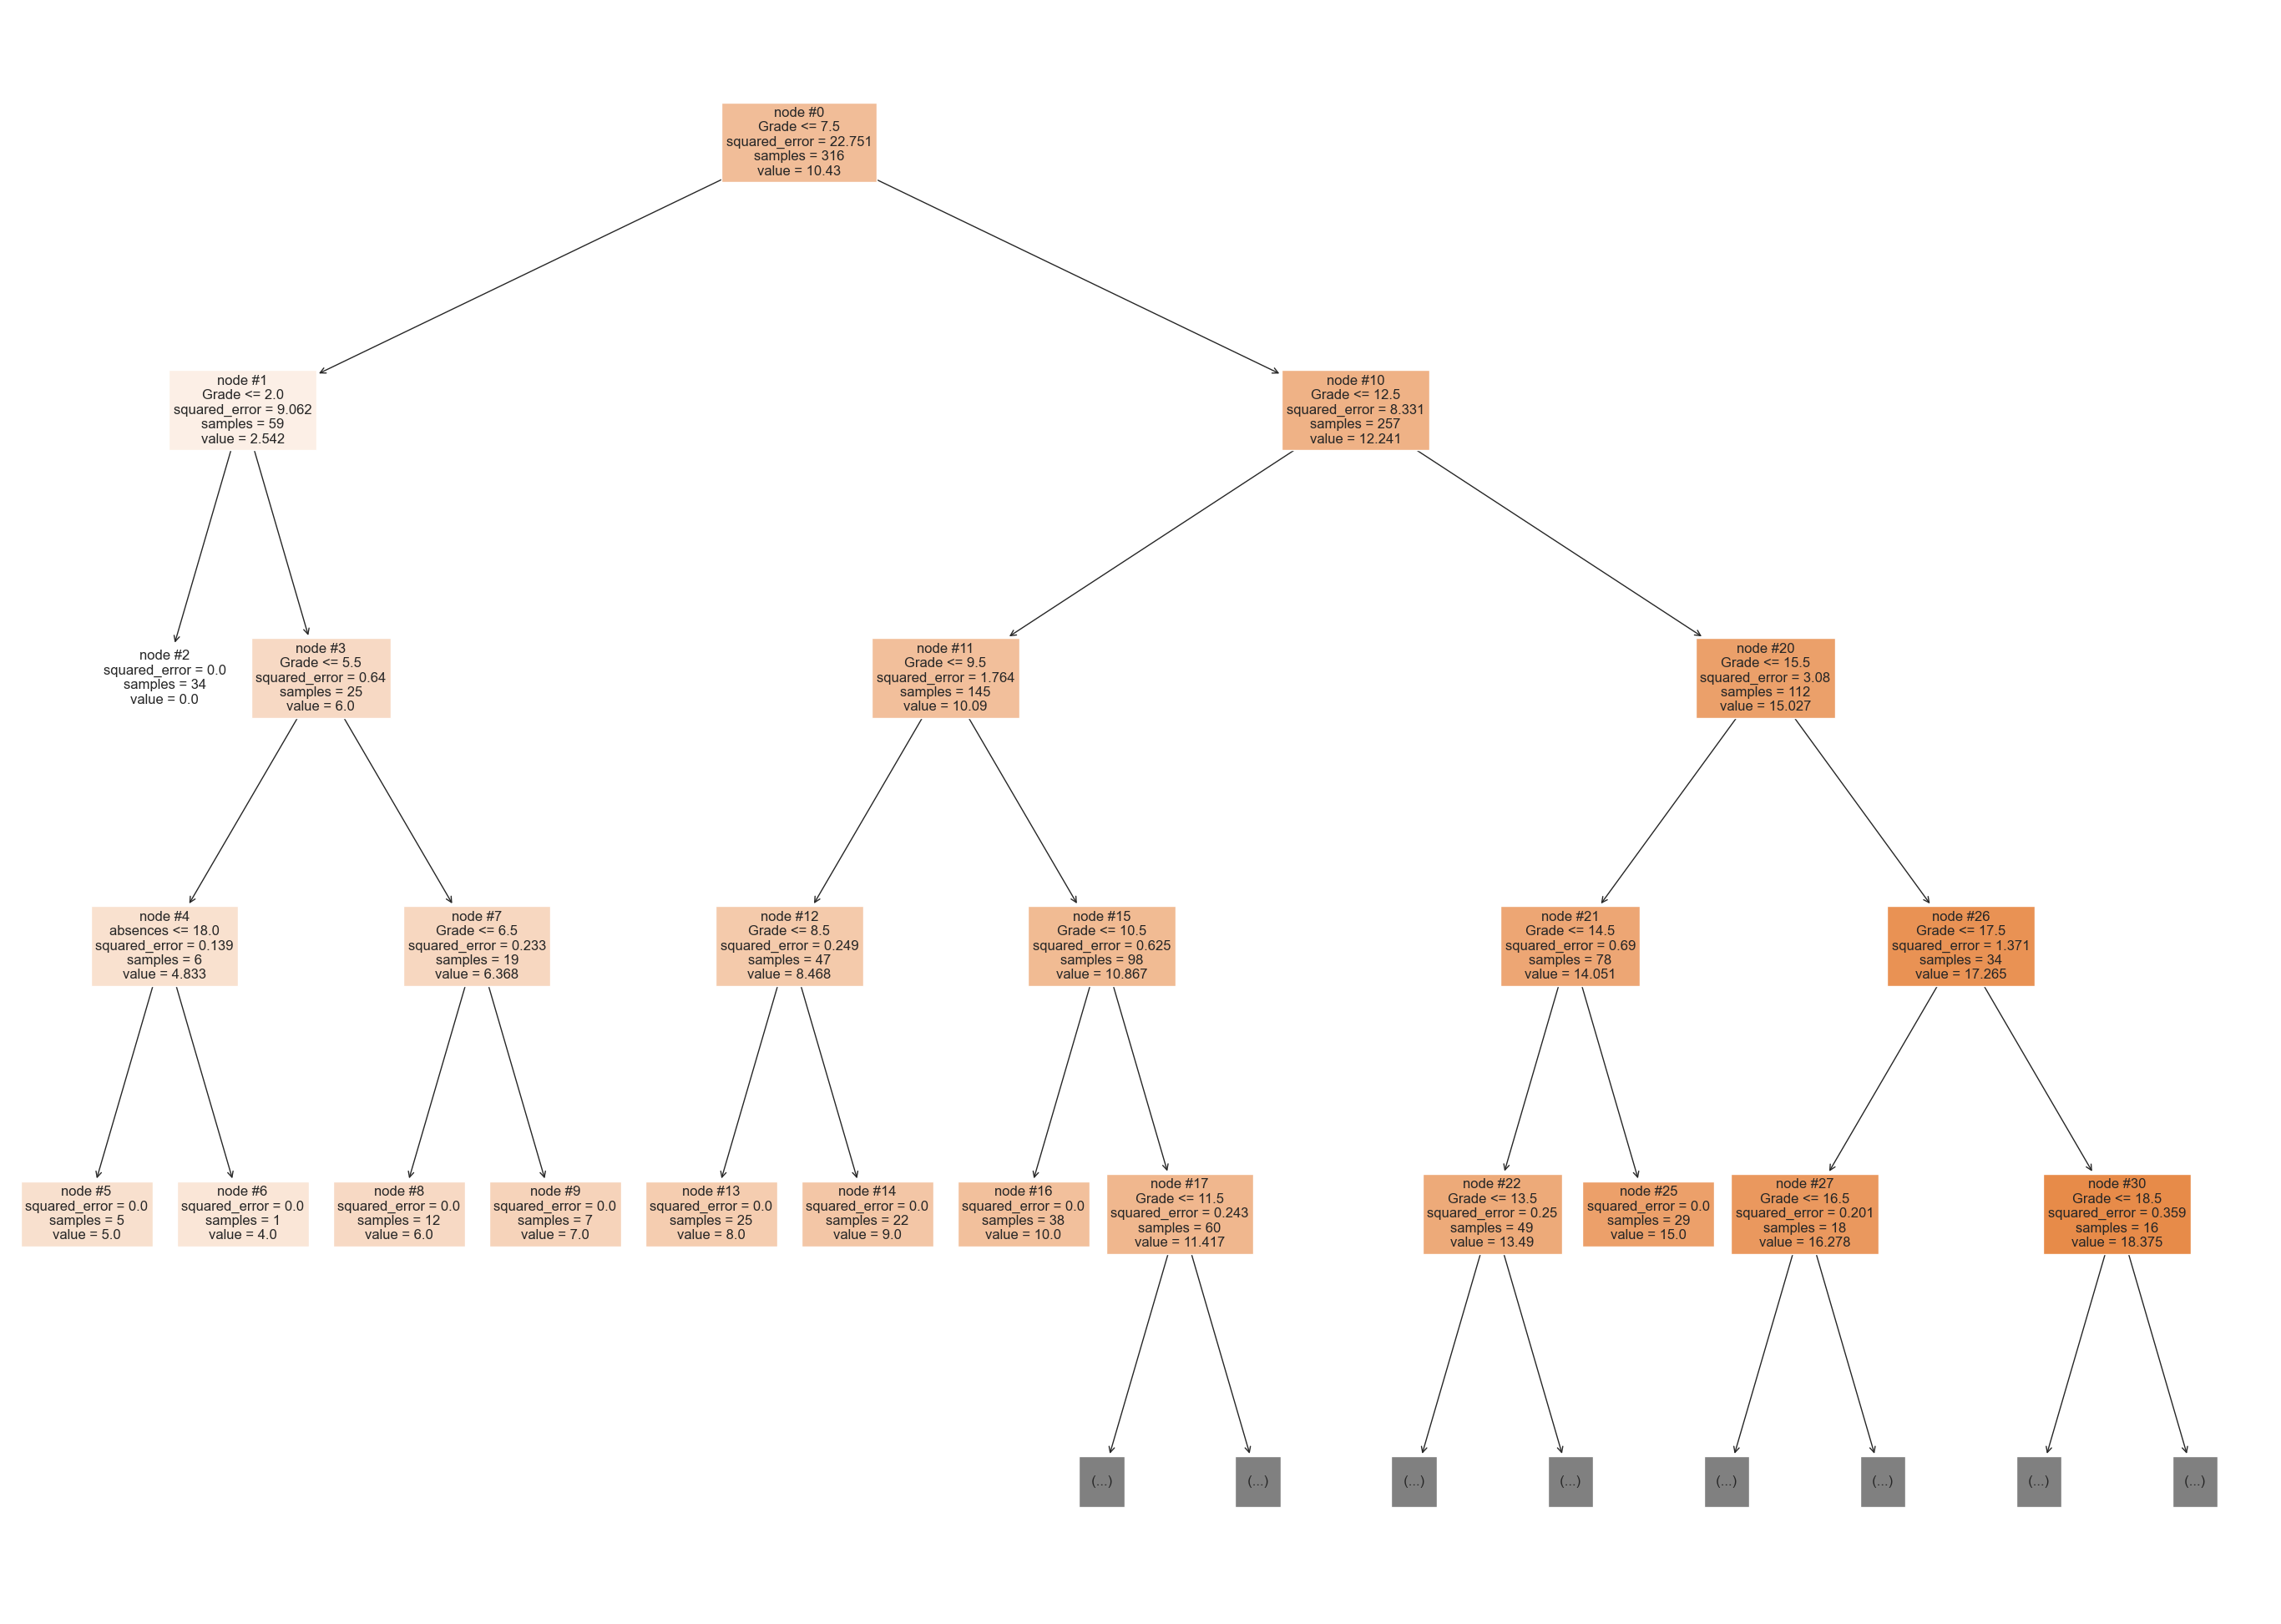

In [57]:
from sklearn.tree import plot_tree

features = list(X2.columns)

plt.figure(figsize = (35, 25))
plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

In [59]:
importances = dt.feature_importances_
columns = X2.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 4))
sns.barplot(importance_df.Importance,importance_df.index)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 800x400 with 0 Axes>